In [1]:
#Set the data
import pandas as pd

df = pd.read_csv('dataset/movement_subsciption.csv', delimiter=',')

print(df.info())
print(df.head(n=10))
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31889 entries, 0 to 31888
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       31889 non-null  int64  
 1   id_user          31889 non-null  int64  
 2   waktu_awal       31889 non-null  object 
 3   waktu_akhir      31889 non-null  object 
 4   total_barang     31889 non-null  int64  
 5   total_transaksi  31889 non-null  int64  
 6   harga            31889 non-null  int64  
 7   bayar            9293 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 1.9+ MB
None
   Unnamed: 0  id_user           waktu_awal          waktu_akhir  \
0           0        1  2008-09-19 13:32:59  2008-10-19 13:32:59   
1           1        2  2008-08-20 23:25:26  2008-08-20 23:25:26   
2           2        2  2008-08-20 23:34:24  2008-08-20 23:34:24   
3           3        2  2008-09-20 23:43:07  2008-10-20 23:43:07   
4           4        3  2

(31889, 8)

In [2]:
#Set the second data
df2 = pd.read_csv('dataset/datamerchant.csv', delimiter=',')
print(df2)
df2.shape

          no  id_user        kategori
0          0       51            Cafe
1          1     2854           Butik
2          2     2874  Toko Kelontong
3          3     2887            Cafe
4          4     2939  Toko Kelontong
...      ...      ...             ...
32028  32028    93811         Bengkel
32029  32029    93813  Toko Kelontong
32030  32030    93808   Counter pulsa
32031  32031    93812          Olshop
32032  32032    93819        Restoran

[32033 rows x 3 columns]


(32033, 3)

In [3]:
#Merge Dataset
df_merge = df.merge(df2, on='id_user', how='left')
print(df_merge)
print(df_merge.info())

       Unnamed: 0  id_user           waktu_awal          waktu_akhir  \
0               0        1  2008-09-19 13:32:59  2008-10-19 13:32:59   
1               1        2  2008-08-20 23:25:26  2008-08-20 23:25:26   
2               2        2  2008-08-20 23:34:24  2008-08-20 23:34:24   
3               3        2  2008-09-20 23:43:07  2008-10-20 23:43:07   
4               4        3  2008-09-21 15:57:07  2008-10-21 15:57:07   
...           ...      ...                  ...                  ...   
31884       31884    22592  2010-04-26 17:03:21  2010-05-26 17:03:21   
31885       31885    22593  2010-04-26 17:13:28  2010-05-26 17:13:28   
31886       31886    22594  2010-04-26 17:19:16  2010-05-26 17:19:16   
31887       31887    18095  2010-04-26 17:46:12  2010-05-26 17:46:12   
31888       31888    22595  2010-04-26 18:06:12  2010-05-26 18:06:12   

       total_barang  total_transaksi   harga    bayar      no        kategori  
0               174               62   49900      NaN  

In [4]:
#Cleaning, Filtering, Manipulating Dataset Merge
#Subset Dataset Merge
dataset_use = df_merge[['id_user', 'waktu_awal', 'waktu_akhir', 'total_barang', 'total_transaksi', 'harga','bayar', 'kategori']]

#Column type correction
dataset_use['waktu_awal'] = pd.to_datetime(dataset_use['waktu_awal'])
dataset_use['waktu_akhir'] = pd.to_datetime(dataset_use['waktu_akhir'])
dataset_use['id_user'] = dataset_use['id_user'].astype(object)

import numpy as np
dataset_use['bayar'] = dataset_use['bayar'].replace(np.nan, 0)
dataset_use['bayar'] = dataset_use['bayar'].round(0).astype(int)
dataset_use['kategori'] = dataset_use['kategori'].replace(np.nan, 'Other')
dataset_use['kategori'] = dataset_use['kategori'].astype('category')

#User churn
print(dataset_use.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31889 entries, 0 to 31888
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_user          31889 non-null  object        
 1   waktu_awal       31889 non-null  datetime64[ns]
 2   waktu_akhir      31889 non-null  datetime64[ns]
 3   total_barang     31889 non-null  int64         
 4   total_transaksi  31889 non-null  int64         
 5   harga            31889 non-null  int64         
 6   bayar            31889 non-null  int32         
 7   kategori         31889 non-null  category      
dtypes: category(1), datetime64[ns](2), int32(1), int64(3), object(1)
memory usage: 1.9+ MB
None


C:\Users\Fajar Ario\AppData\Local\Temp\ipykernel_13360\3255105063.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_use['waktu_awal'] = pd.to_datetime(dataset_use['waktu_awal'])
C:\Users\Fajar Ario\AppData\Local\Temp\ipykernel_13360\3255105063.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_use['waktu_akhir'] = pd.to_datetime(dataset_use['waktu_akhir'])
C:\Users\Fajar Ario\AppData\Local\Temp\ipykernel_13360\3255105063.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [5]:
#Setting up Column Churn data
data = []

for row in range(len(dataset_use['id_user'])):
    if dataset_use.bayar[row] >= dataset_use.harga[row]:
        data.append('New User')
    else :
        data.append('Churn User')
        
# Create 'churn' column

dataset_use['churn'] = data
dataset_use['churn'] = dataset_use['churn'].astype('category')

print(dataset_use.head())
print(dataset_use.info())

    

  id_user          waktu_awal         waktu_akhir  total_barang  \
0       1 2008-09-19 13:32:59 2008-10-19 13:32:59           174   
1       2 2008-08-20 23:25:26 2008-08-20 23:25:26            11   
2       2 2008-08-20 23:34:24 2008-08-20 23:34:24            11   
3       2 2008-09-20 23:43:07 2008-10-20 23:43:07          1171   
4       3 2008-09-21 15:57:07 2008-10-21 15:57:07           185   

   total_transaksi  harga  bayar        kategori       churn  
0               62  49900      0  Toko Kelontong  Churn User  
1                6  49900      0           Other  Churn User  
2                6  49900      0           Other  Churn User  
3               22  49900  49900           Other    New User  
4              474  49900      0           Other  Churn User  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31889 entries, 0 to 31888
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   

C:\Users\Fajar Ario\AppData\Local\Temp\ipykernel_13360\751741878.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_use['churn'] = data
C:\Users\Fajar Ario\AppData\Local\Temp\ipykernel_13360\751741878.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_use['churn'] = dataset_use['churn'].astype('category')


C:\Users\Fajar Ario\AppData\Local\Temp\ipykernel_13360\4097623459.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  churn_vs_new = dataset_use.groupby('churn')['total_barang','total_transaksi'].sum()


            total_barang  total_transaksi
churn                                    
Churn User       1226764          4081982
New User         2458363         20679901


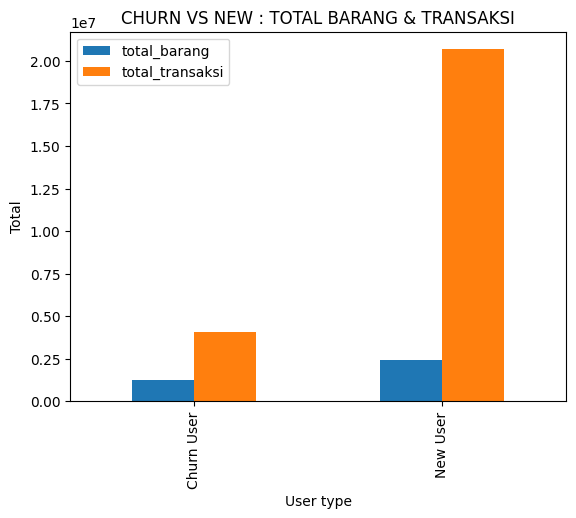

In [6]:
#Churn User vs New User on Total Barang & Total Transaction
import matplotlib.pyplot as plt

churn_vs_new = dataset_use.groupby('churn')['total_barang','total_transaksi'].sum()

print(churn_vs_new)

#Visualization
churn_vs_new.plot(kind='bar')
plt.title('CHURN VS NEW : TOTAL BARANG & TRANSAKSI')
plt.ylabel('Total')
plt.xlabel('User type')
plt.show()


kategori  Bengkel  Butik  Cafe  Counter pulsa  Kaki Lima  Minimarket  Olshop  \
month                                                                          
1               7     10    27             17          1           7      26   
2              14     41   154            106         25          34     113   
3              16     52   192            137         36          42     140   
4              18     75   220            187         30          64     158   
5              19     65   216            159         33          58     137   
6               1      0     8              5          0           7       6   
7               0      2     6              8          3           3       4   
8               2      6    17              7          0           5       9   
9               0      5    12             11          4           4       6   
10              2      4    15              9          3           5      11   
11              3      8    17          

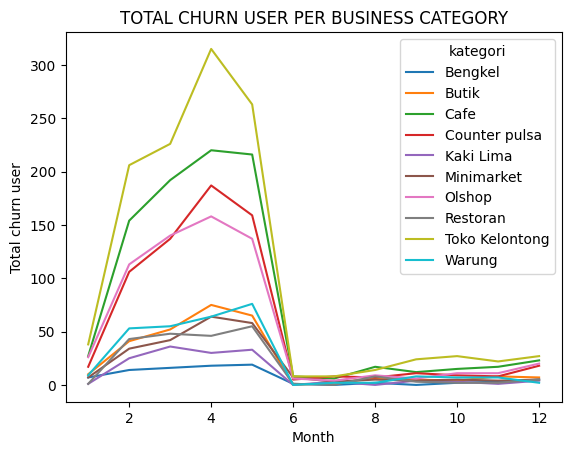

In [7]:
#Total Churn User on Category Business
dataset_use['month'] = dataset_use['waktu_akhir'].dt.month

#Filtering for pivot table
churn_user = dataset_use[dataset_use['churn']== 'Churn User']
filter_ = ~churn_user['kategori'].isin(['Other'])
churn_user_filtered = churn_user[filter_]

#Pivot Table the data
churn_category = pd.pivot_table(churn_user_filtered,index='month', columns='kategori', values='churn', aggfunc='count', observed='kategori', fill_value=0)

print(churn_category)

#Visualization Total churn user per month in 4 years.
churn_category.plot()
plt.title('TOTAL CHURN USER PER BUSINESS CATEGORY')
plt.ylabel('Total churn user')
plt.xlabel('Month')
plt.show()

churn           Churn User
kategori                  
Toko Kelontong      203721
Cafe                 80237
Counter pulsa        66249
Butik                58497
Minimarket           20661
Kaki Lima             9941
Olshop               78281
Warung               40300
Bengkel               5291
Restoran             46295
churn           New User
kategori                
Toko Kelontong    467136
Counter pulsa     101161
Olshop            356273
Cafe              383532
Warung            284361
Kaki Lima          24052
Restoran           98222
Butik              47070
Minimarket         31673
Bengkel             3714


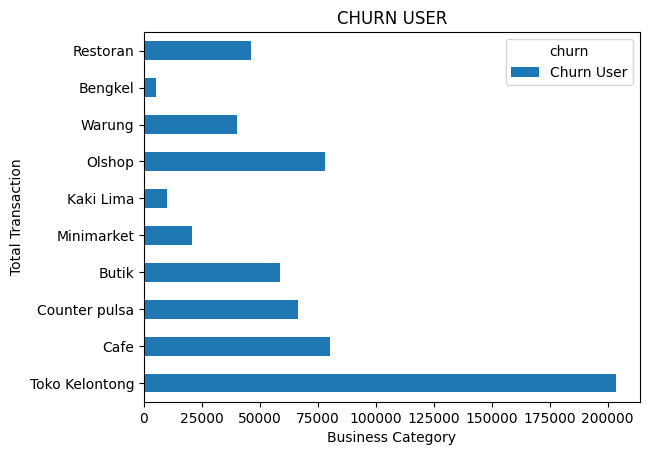

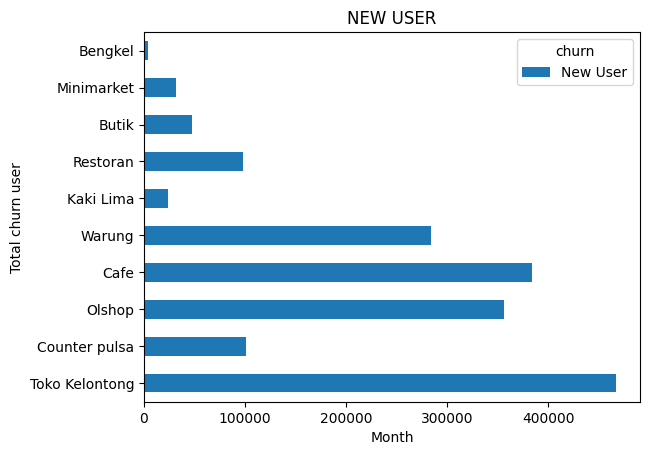

In [12]:
#Churn vs New User : Total Transaction

#Pivot Table the data : Churn User
churn_total_trans = pd.pivot_table(churn_user_filtered,index='kategori', columns='churn', values='total_transaksi', aggfunc='sum', observed='kategori', fill_value=0)

print(churn_total_trans)

#Pivot Table the data : New User
new_user = dataset_use[dataset_use['churn']== 'New User']
filter_ = ~new_user['kategori'].isin(['Other'])
new_user_filtered = new_user[filter_]

new_total_trans = pd.pivot_table(new_user_filtered,index='kategori', columns='churn', values='total_transaksi', aggfunc='sum', observed='kategori', fill_value=0)

print(new_total_trans)

#Visualization
churn_total_trans.plot(kind='barh')
plt.title('CHURN USER')
plt.ylabel('Total Transaction')
plt.xlabel('Business Category')

new_total_trans.plot(kind='barh')
plt.title('NEW USER')
plt.ylabel('Total churn user')
plt.xlabel('Month')
plt.show()

In [13]:
#Descriptive Statistic
#Churn User
print(churn_user_filtered['total_transaksi'].describe())

#New User
print(new_user_filtered['total_transaksi'].describe())

#Comparing
print("Churn user have bigger average transaction : " + np.str(churn_user_filtered['total_transaksi'].mean() > new_user_filtered['total_transaksi'].mean()))
print("Churn user have smaller standart deviation transaction : " + np.str(churn_user_filtered['total_transaksi'].std() > new_user_filtered['total_transaksi'].std()))


count     4637.000000
mean       131.436920
std        791.148444
min         -2.000000
25%          0.000000
50%          1.000000
75%         10.000000
max      21483.000000
Name: total_transaksi, dtype: float64
count      985.000000
mean      1824.562437
std       3358.187020
min          0.000000
25%         89.000000
50%        480.000000
75%       1770.000000
max      28402.000000
Name: total_transaksi, dtype: float64
Churn user have bigger average transaction : False
Churn user have smaller standart deviation transaction : False


C:\Users\Fajar Ario\AppData\Local\Temp\ipykernel_13360\4085467262.py:9: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print("Churn user have bigger average transaction : " + np.str(churn_user_filtered['total_transaksi'].mean() > new_user_filtered['total_transaksi'].mean()))
C:\Users\Fajar Ario\AppData\Local\Temp\ipykernel_13360\4085467262.py:10: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/relea